# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación y limpieza de datos**<a id='21'></a>

In [1]:
# Librery
from utils.libreries import *


%matplotlib inline 
# Read all csv 

preroot=os.getcwd()
df=pd.read_csv(preroot+'/data/raw/waterQuality.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [3]:
# Transform all object columns to numeric:
df.ammonia=[float(i) if (i!='#NUM!') else np.nan for i in df.ammonia]
df.is_safe=[int(i) if (i!='#NUM!') else np.nan for i in df.is_safe]

In [4]:
df.isna().sum()*100/len(df)

aluminium      0.000000
ammonia        0.037505
arsenic        0.000000
barium         0.000000
cadmium        0.000000
chloramine     0.000000
chromium       0.000000
copper         0.000000
flouride       0.000000
bacteria       0.000000
viruses        0.000000
lead           0.000000
nitrates       0.000000
nitrites       0.000000
mercury        0.000000
perchlorate    0.000000
radium         0.000000
selenium       0.000000
silver         0.000000
uranium        0.000000
is_safe        0.037505
dtype: float64

In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

##  **2.2. Feature Engineering**<a id='22'></a>

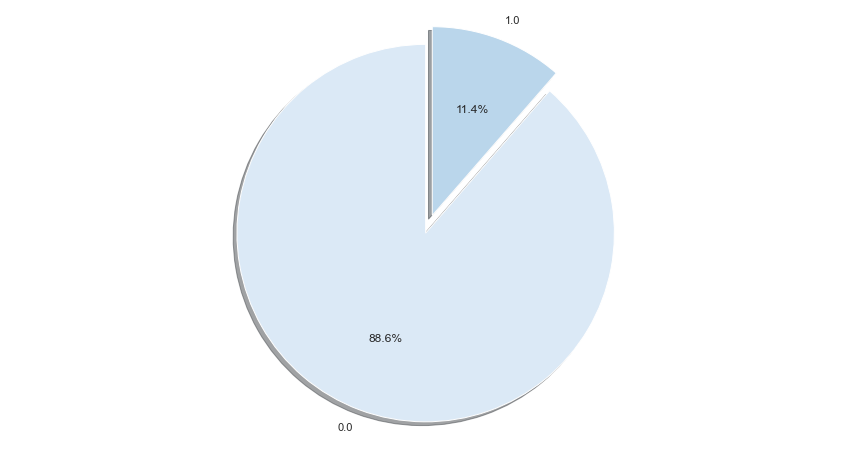

In [6]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = df.is_safe.value_counts().index
sizes = df.is_safe.value_counts()
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<AxesSubplot:xlabel='is_safe', ylabel='count'>

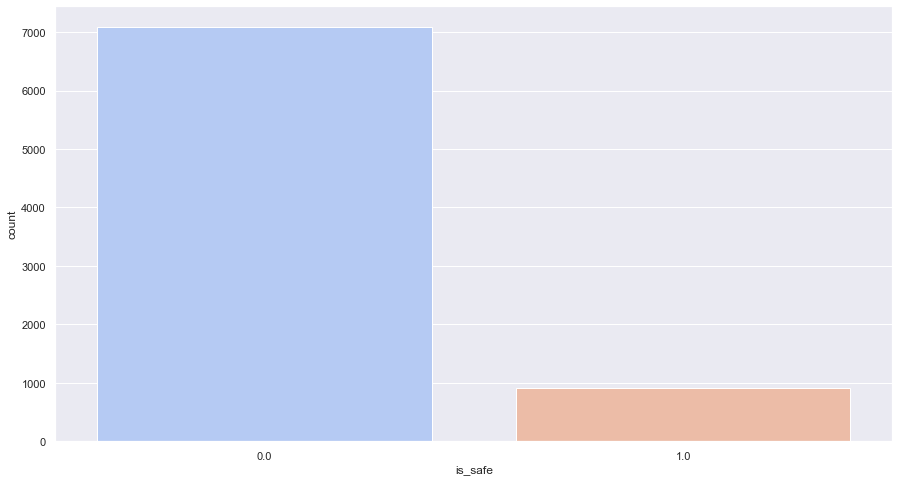

In [7]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x='is_safe',data=df,palette="coolwarm")

**Observaciones:**

- Dataset desbalanceado

**Propuestas:**

Al tener un dataset desbalanceado se buscan una serie de opciones, en este caso, suponiendo que no se puedan obtener más datos que equilibren nuestro dataset se plantean las siguientes opciones.
- Opciones para *balancear la data*:

    - Oversampling.
    - Undersampling.
    - Métodos mixtos.

Se puede apreciar visualmente a continuación: 

<img src="https://miro.medium.com/max/1400/1*o_KfyMzF7LITK2DlYm_wHw.png" alt="drawing" width="450x500"/>
<img src="https://miro.medium.com/max/1400/1*gHW_PLz7kWrhdl5t1sJRRA.png" alt="drawing" width="450x500"/>
  

##  **2.3. Modelado**<a id='23'></a>

## Baseline:

Con este apartado se pretende hacer una `prueba de contacto` con los modelos ***sin tratar los datos apenas***, ***sin buscar los hiperparámetros que mejor ajusten*** y ***sin balancear el dataset***. Simplemente para tener una noción del punto de partida y las diferencias sustanciales de cada modelo, aunque esto pueda cambiar con las modificaciones que se desarrollan posteriormente.

<class 'list'>
Saved
--------------------
LogisticRegression()
--------------------



/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


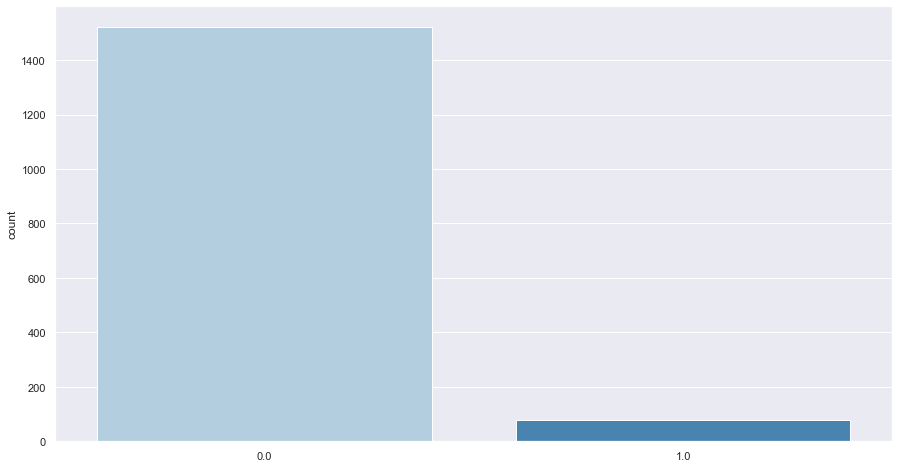

Saved
--------------------
KNeighborsClassifier()
--------------------



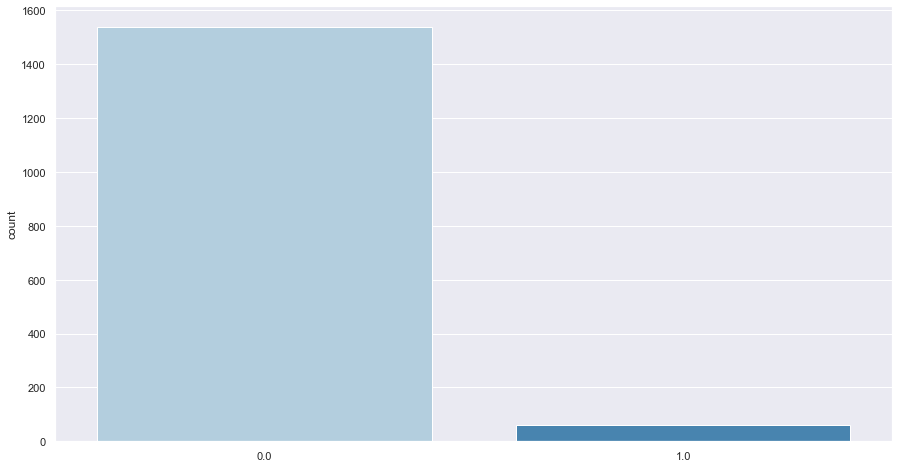

Saved
--------------------
DecisionTreeClassifier()
--------------------



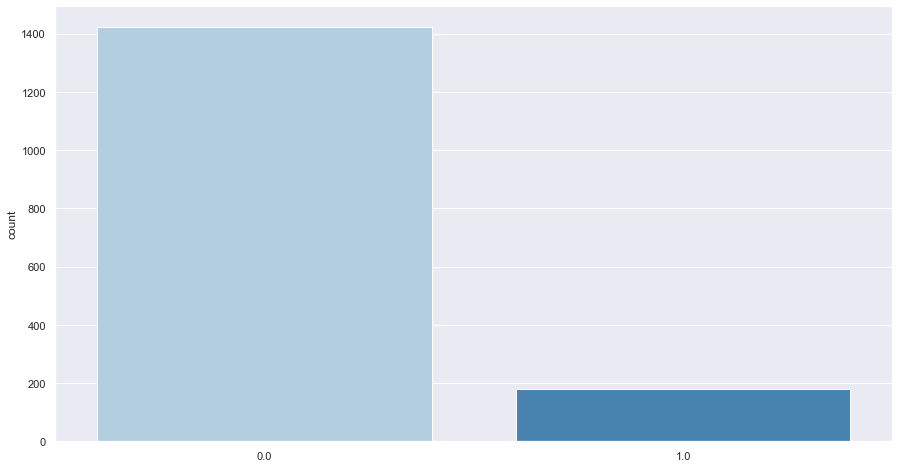

Saved
--------------------
ExtraTreeClassifier()
--------------------



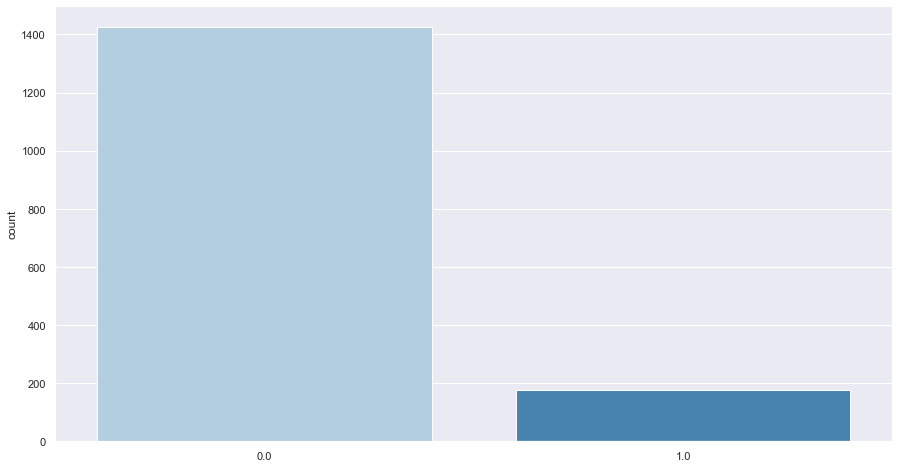

Saved
--------------------
RandomForestClassifier()
--------------------



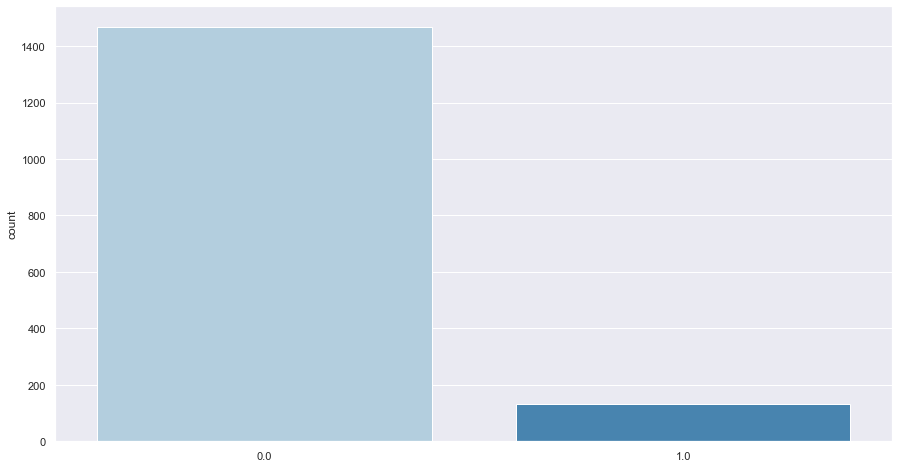

Saved
--------------------
BaggingClassifier()
--------------------



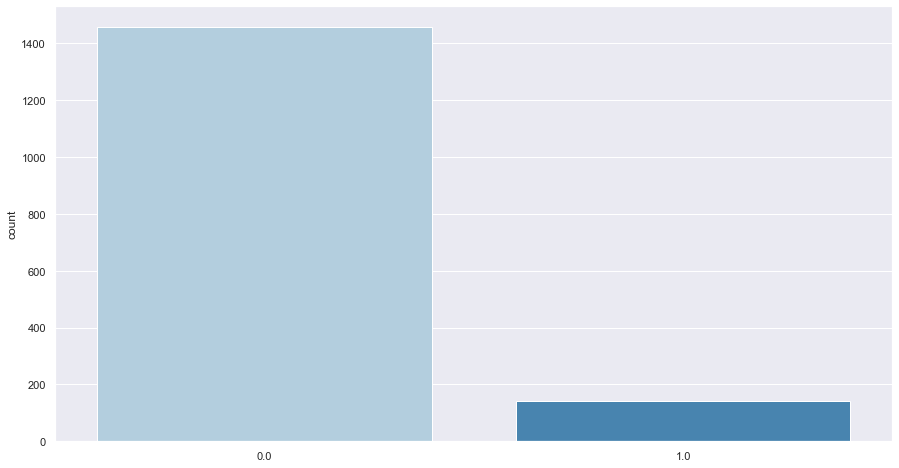

Saved
--------------------
AdaBoostClassifier()
--------------------



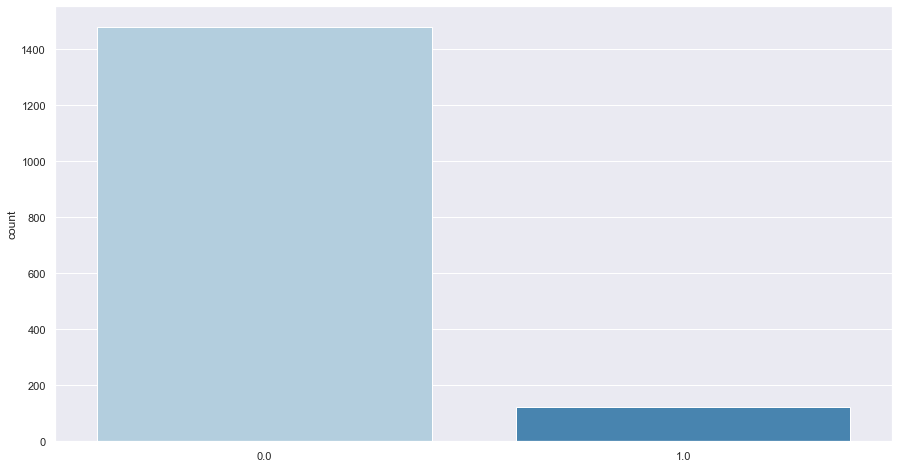

Saved
--------------------
GradientBoostingClassifier()
--------------------



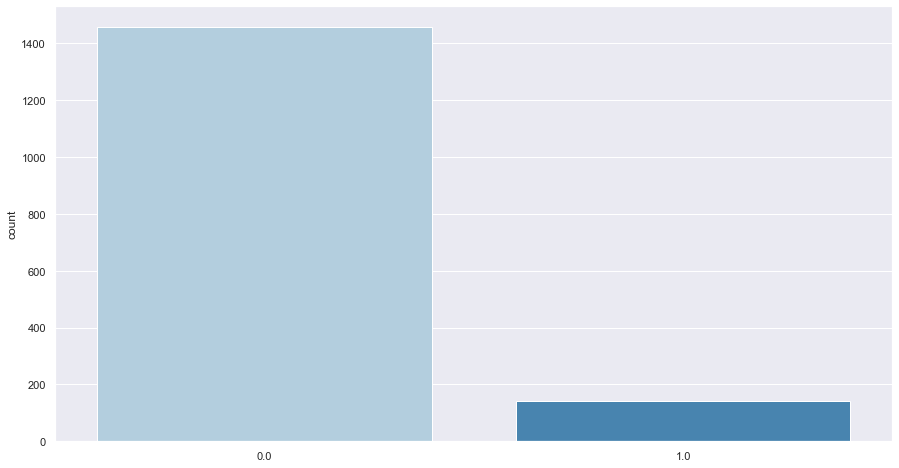

Saved
--------------------
SVC()
--------------------



/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


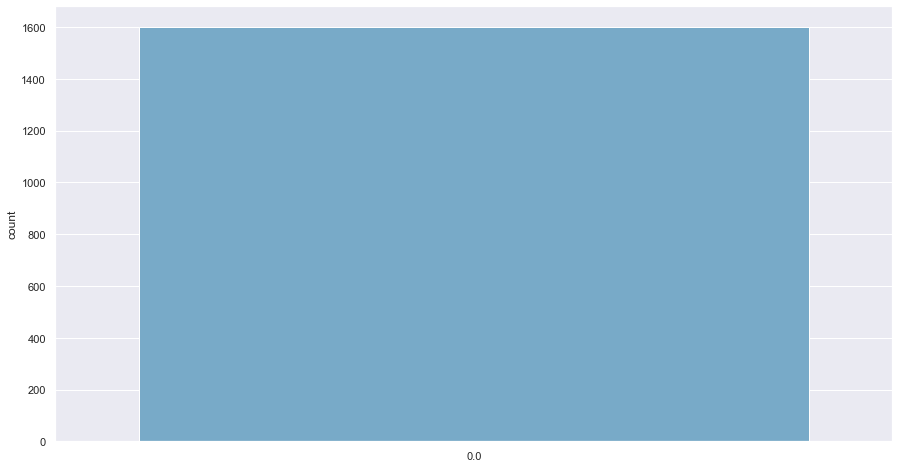

Saved
--------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
--------------------



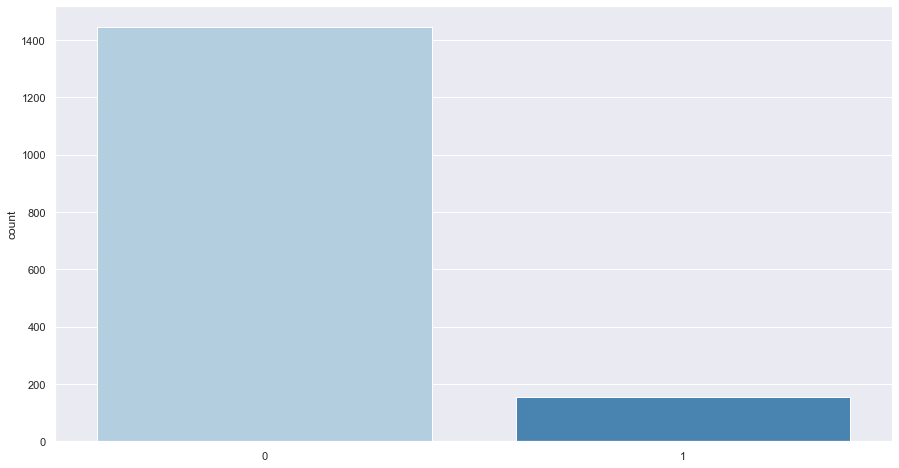

Saved
--------------------
VotingClassifier(estimators=[('RFC', RandomForestClassifier())])
--------------------



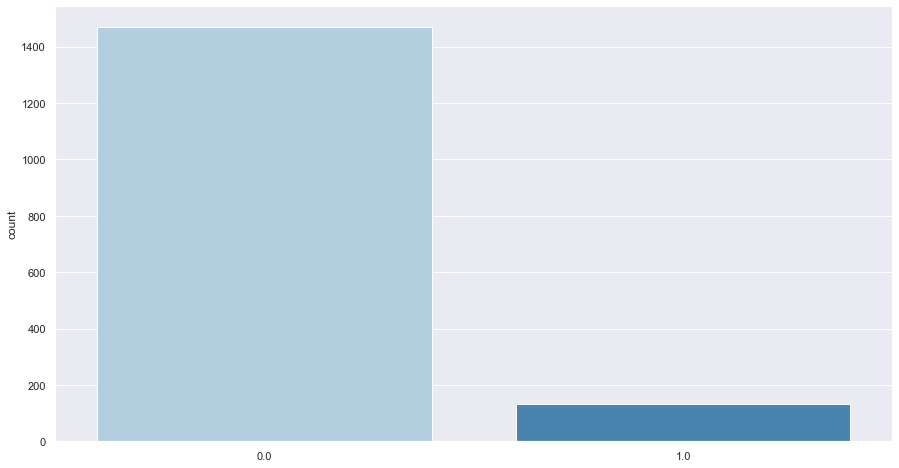

Saved
--------------------
LinearDiscriminantAnalysis()
--------------------



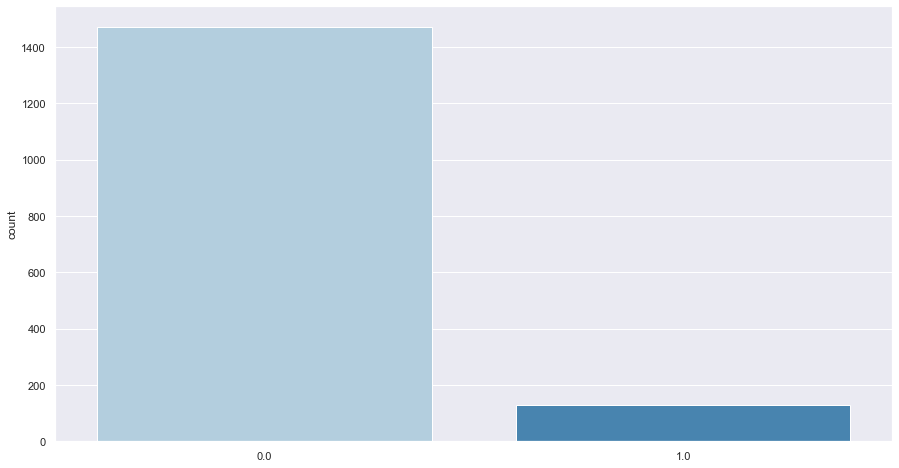

In [8]:
modelos = choose_models('all',None,clf = True)
for modelo in list(modelos.keys()):
    metricas,pack = baseline(df, 'is_safe', base_model = modelos[modelo], clf = True,file_name='baseline_metrics.csv')
    print(20*'-'+'\n'+f'{str(modelos[modelo])}'+'\n'+20*'-'+'\n')
    sns.countplot(x=pack['ypred'],palette='Blues');
    plt.show()

In [18]:
pack['trained_model'].get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [10]:
x=pd.read_csv(os.getcwd()+'/model/model_metrics/baseline_metrics.csv',sep=';')
x

,model,ACC,Precision,Recall,F1,ROC,Jaccard
0,LogisticRegression,0.908750,0.632911,0.299401,0.406504,0.639582,0.255102
1,KNeighborsClassifier,0.889375,0.419355,0.155689,0.227074,0.565283,0.128079
2,DecisionTreeClassifier,0.959375,0.786517,0.838323,0.811594,0.905903,0.682927
3,ExtraTreeClassifier,0.897500,0.508571,0.532934,0.520468,0.736460,0.351779
4,RandomForestClassifier,0.961250,0.894737,0.712575,0.793333,0.851403,0.657459
5,BaggingClassifier,0.968750,0.909091,0.778443,0.838710,0.884686,0.722222
6,AdaBoostClassifier,0.942500,0.804878,0.592814,0.682759,0.788033,0.518325
7,GradientBoostingClassifier,0.965000,0.888112,0.760479,0.819355,0.874657,0.693989
8,SVC,0.895625,0.000000,0.000000,0.000000,0.500000,0.000000
9,XGBClassifier,0.973750,0.903226,0.838323,0.869565,0.913928,0.769231


<module 'matplotlib.pyplot' from '/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/matplotlib/pyplot.py'>

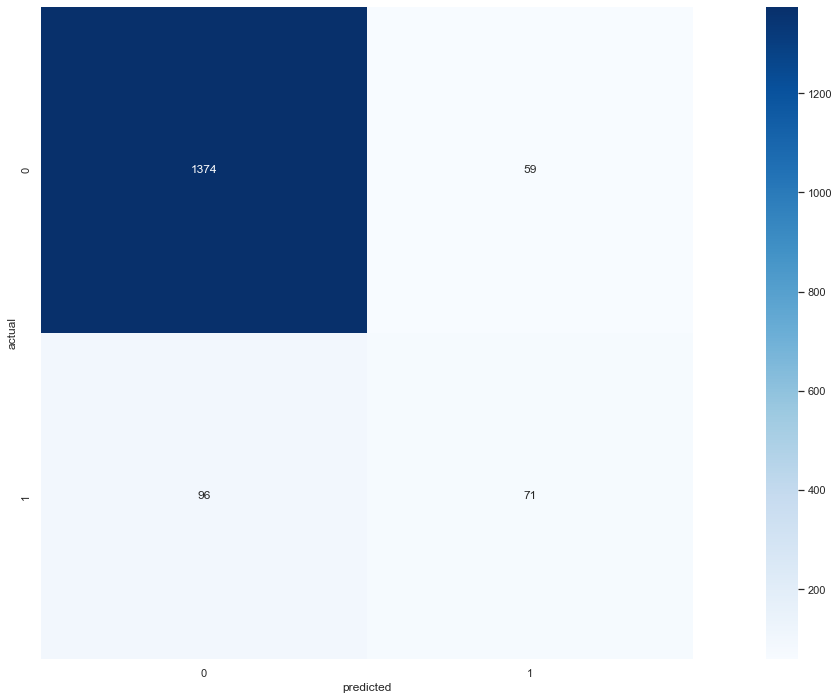

In [19]:
# Create a confusion matrix NO Ovesampling
plt.figure(figsize= [26, 12])
matrix = confusion_matrix(pack['Xytest'][1], pack['ypred'])
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [ ]:
import pickle
model=pack['trained_model']
filename = 'model/modeloprueba.pickle'
pickle.dump(model, open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict_proba(pack['Xytest'][0])
print("Prediccion: {}".format(result))


In [ ]:
def models_generator(data, target, model = None, clf = True, file_name = 'metrics.csv', dir_file = 'model/model_metrics', tsize = 0.2, random = 77):
    '''
    Objetivo: 
    ---
    Crear un modelo inicial orientativo.

    *args.
    ----
    data: pd.DataFrame; el dataset completo, con los valores numéricos.
    target: str; nombre de la columna objetivo, variable dependiente.
    base_model: estimador que se va a utilizar. Predeterminadamente se utilizar RandomForest(). (opcional)
    clf: True/False; si es un dataset de clasificación (True) si es de regresión (False). (opcional)
    tsize: float; tamaño del test [0.0,1.0]. (opcional)
    random: int; random state, semilla. (opcional)

    *ret.
    ----
    metricas de evaluación del modelo y el pack: 
        model_pack = {

            'trained_model' : estimator,
            'Xytest' : [X_test, y_test],
            'Xytrain' : [X_train, y_train],
            'ypred' : y_pred
        }

    '''

    if base_model == None:
        if clf:
            base_model = RandomForestClassifier()
        else:
            base_model = RandomForestRegressor()

    X = data.drop([target], axis=1)
    y = data[target].copy()
    #print('X shape: ',X.shape, '; y shape: ',y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsize, random_state = random)
    if scaling:
        scaler = StandardScaler().fit_transform(X_train)
        scaler.transform(X_test)


    estimator=base_model.fit(X_train,y_train)
    y_pred=estimator.predict(X_test)
    model_pack = {

        'trained_model' : estimator,
        'Xytest' : [X_test, y_test],
        'Xytrain' : [X_train, y_train],
        'ypred' : y_pred
    }

    metrics = eval_metrics(y_pred,y_test,clf)
    model_str = str(base_model)
    model_str = model_str[0:model_str.find('(')]

    dict4save(metrics, file_name, dir_file, addcols=True, cols='model', vals=model_str,sep=';')
    
    return metrics, model_pack

In [17]:
target='is_safe'
data = df
X = data.drop([target], axis=1)
y = data[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)
x=GridSearchCV(LogisticRegression(),choose_params('LogReg'),scoring='precision')
x.fit(X_train,y_train)

/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': ['none', 'balanced'],
                         'max_iter': [100, 150, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='precision')

In [24]:
x.cv

In [25]:
x.best_score_

0.6861334995676025

In [26]:
x.scoring

'precision'

In [27]:
x.scorer_

make_scorer(precision_score, average=binary)

In [30]:
pd.DataFrame(x.cv_results_.sort_values)


AttributeError: 'dict' object has no attribute 'sort_values'

In [33]:
ypred=x.best_estimator_.predict(X_test)

In [34]:
eval_metrics(ypred,y_test)

{'ACC': 0.915,
 'Precision': 0.6703296703296703,
 'Recall': 0.3652694610778443,
 'F1': 0.4728682170542636,
 'ROC': 0.672167179945761,
 'Jaccard': 0.3096446700507614}

In [19]:
x.best_params_

{'class_weight': 'none',
 'max_iter': 100,
 'penalty': 'none',
 'solver': 'newton-cg'}

In [12]:
choose_params('LogReg')

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'class_weight': ['none', 'balanced'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [100, 150, 200, 500]}

In [15]:
x.fit()

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'